# AUTHOR : GANESH S

# TASK 3:  *PREDICTION USING DECISION TREE ALGORITHM*

###  PROBLEM STATEMENT : 
- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### STEPS FOLLOWED FOR THIS TASK ARE AS FOLLOWS 

### STEP 1 : 
- IMPORTING THE LIBRARIES THAT ARE REQUIRED FOR DATA ANALYSIS AND VISUALIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

### STEP 2 : CREATING A DATAFRAME WITH FEATURE NAMES

In [2]:
IRISS = datasets.load_iris()
df = pd.DataFrame(IRISS["data"], columns = ["Petal length","Petal Width","Sepal Length","Sepal Width"])
print(df.head(10))

   Petal length  Petal Width  Sepal Length  Sepal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1


### STEP 3 : CREATING TARGET FEATURE FROM THE DATAFRAME

In [3]:
df['Species']=IRISS['target']
df['Species']=df['Species'].apply(lambda x: IRISS['target_names'][x])

### STEP 4 :
**CHECKING SKEWNESS FOR DIFFERENT FEATURES OF DATA**
- we can see that the 2 columns sepal length and width are positively skewed and the other 2 are negatively skewed
- visualizing for better understanding

Petal length    0.314911
Petal Width     0.318966
Sepal Length   -0.274884
Sepal Width    -0.102967
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


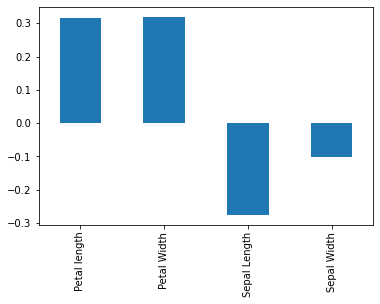

In [4]:
print(df.skew())
print(df.skew().plot(kind="bar"))

### STEP 5 : SHAPE OF THE DATA
 
- From the this we can observe that the given dataset contains **150 rows** and **2 columns** respectively.

In [5]:
df.shape

(150, 5)

### STEP 6 : THE pd.info() function

 - This step helps us to identify the current data types, number of columns etc. ofthe dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### STEP 7: CHECKING NULL VALUES

- a)  This step is one of the most important steps as it helps us to find the columns which have null values and gives the count of missing entries in the dataset. based on its result we can decide for ourselves whether to fill those data with null values or drop them from the data as required.
- b) Here we can see that there are no null values in our dataset.

In [18]:
df.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

### STEP 8: ANALYZING SOME STATISTICAL VALUE OF THE DATA

#### THE DESCRIBE FUNCTION IS USED FOR A GENERAL STATISTICAL ANALYSIS OF DATA.

- a) For instance we can see the average or mean study **sepal width (cm)** of the data is 1.199 and we see 75% of **petal width (cm)** data is around 3.3000 for the given dataset

- b) Same can be inferred for other features as well.

In [6]:
df.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## DATA VISUALIZATION

### STEP 9: HISTOGRAM PLOT FOR TARGET FEATURE
- histogram has been plotted for the target feature
- Histogram is basically used for frequency plotting, so the below histograms shows the same for the target features.

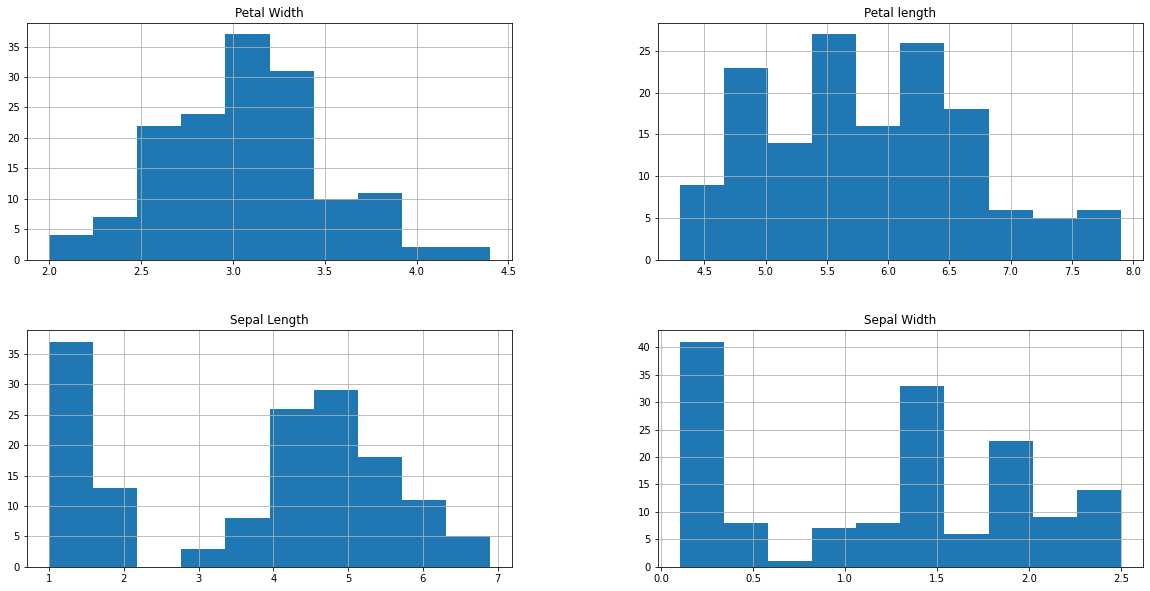

In [8]:
df.hist(figsize=[20,10])
#plt.legend(df)
plt.show()

### STEP 10: PAIR PLOT FOR TARGET FEATURE
- Pairplots are best to use when we want to  quickly explore distributions and relationships in a dataset.
- I have made pairplot for the dataframe with hue value as **Species** which is our target feature as well.

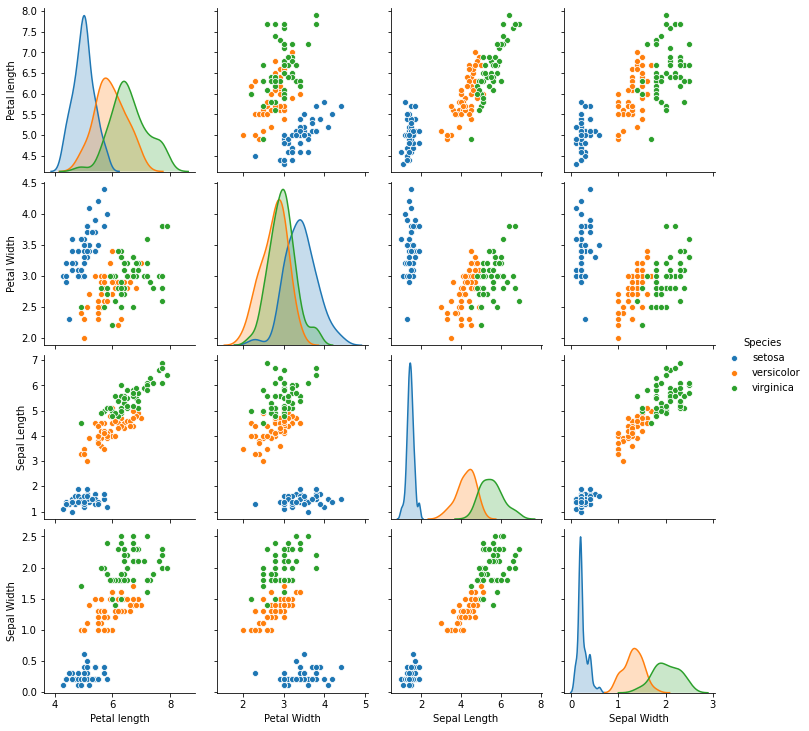

In [9]:
sns.pairplot(df, hue = "Species")
plt.show()

### STEP 11 : 
- This step helps us to identify how better the features are correlated with each other. The darker the shade/color in the heatmap, more is the correlation among the variables.

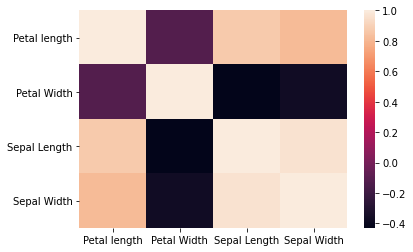

In [19]:
sns.heatmap(df.corr())

### STEP 12 : MODEL BUILDING
- Implementing Decsision Tree Classifier ALgorithm
- This model can be implemented for both classification anf regression problems.
- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

 **Defining X and y that is attributes and target values for model building**

In [10]:
X = df[["Sepal Length","Sepal Width","Petal length","Petal Width"]]
y = df["Species"]

**Spliting the data into 70:30 for train and test data respectively.**

In [11]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3)

In [12]:
X_train=train[["Sepal Length","Sepal Width","Petal length","Petal Width"]]
y_train=train.Species

In [13]:
X_test=test[["Sepal Length","Sepal Width","Petal length","Petal Width"]]
y_test=test.Species

**Importing Decision Tree Classifier from scikit library and instantiating the same.**

In [25]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(random_state=10)
Dtree.fit(X_train, y_train)
y_pred = Dtree.predict(X_test)


### STEP 13: VISUALIZING DECISION TREE 
- visualization done using plot_tree library of scikit learn.

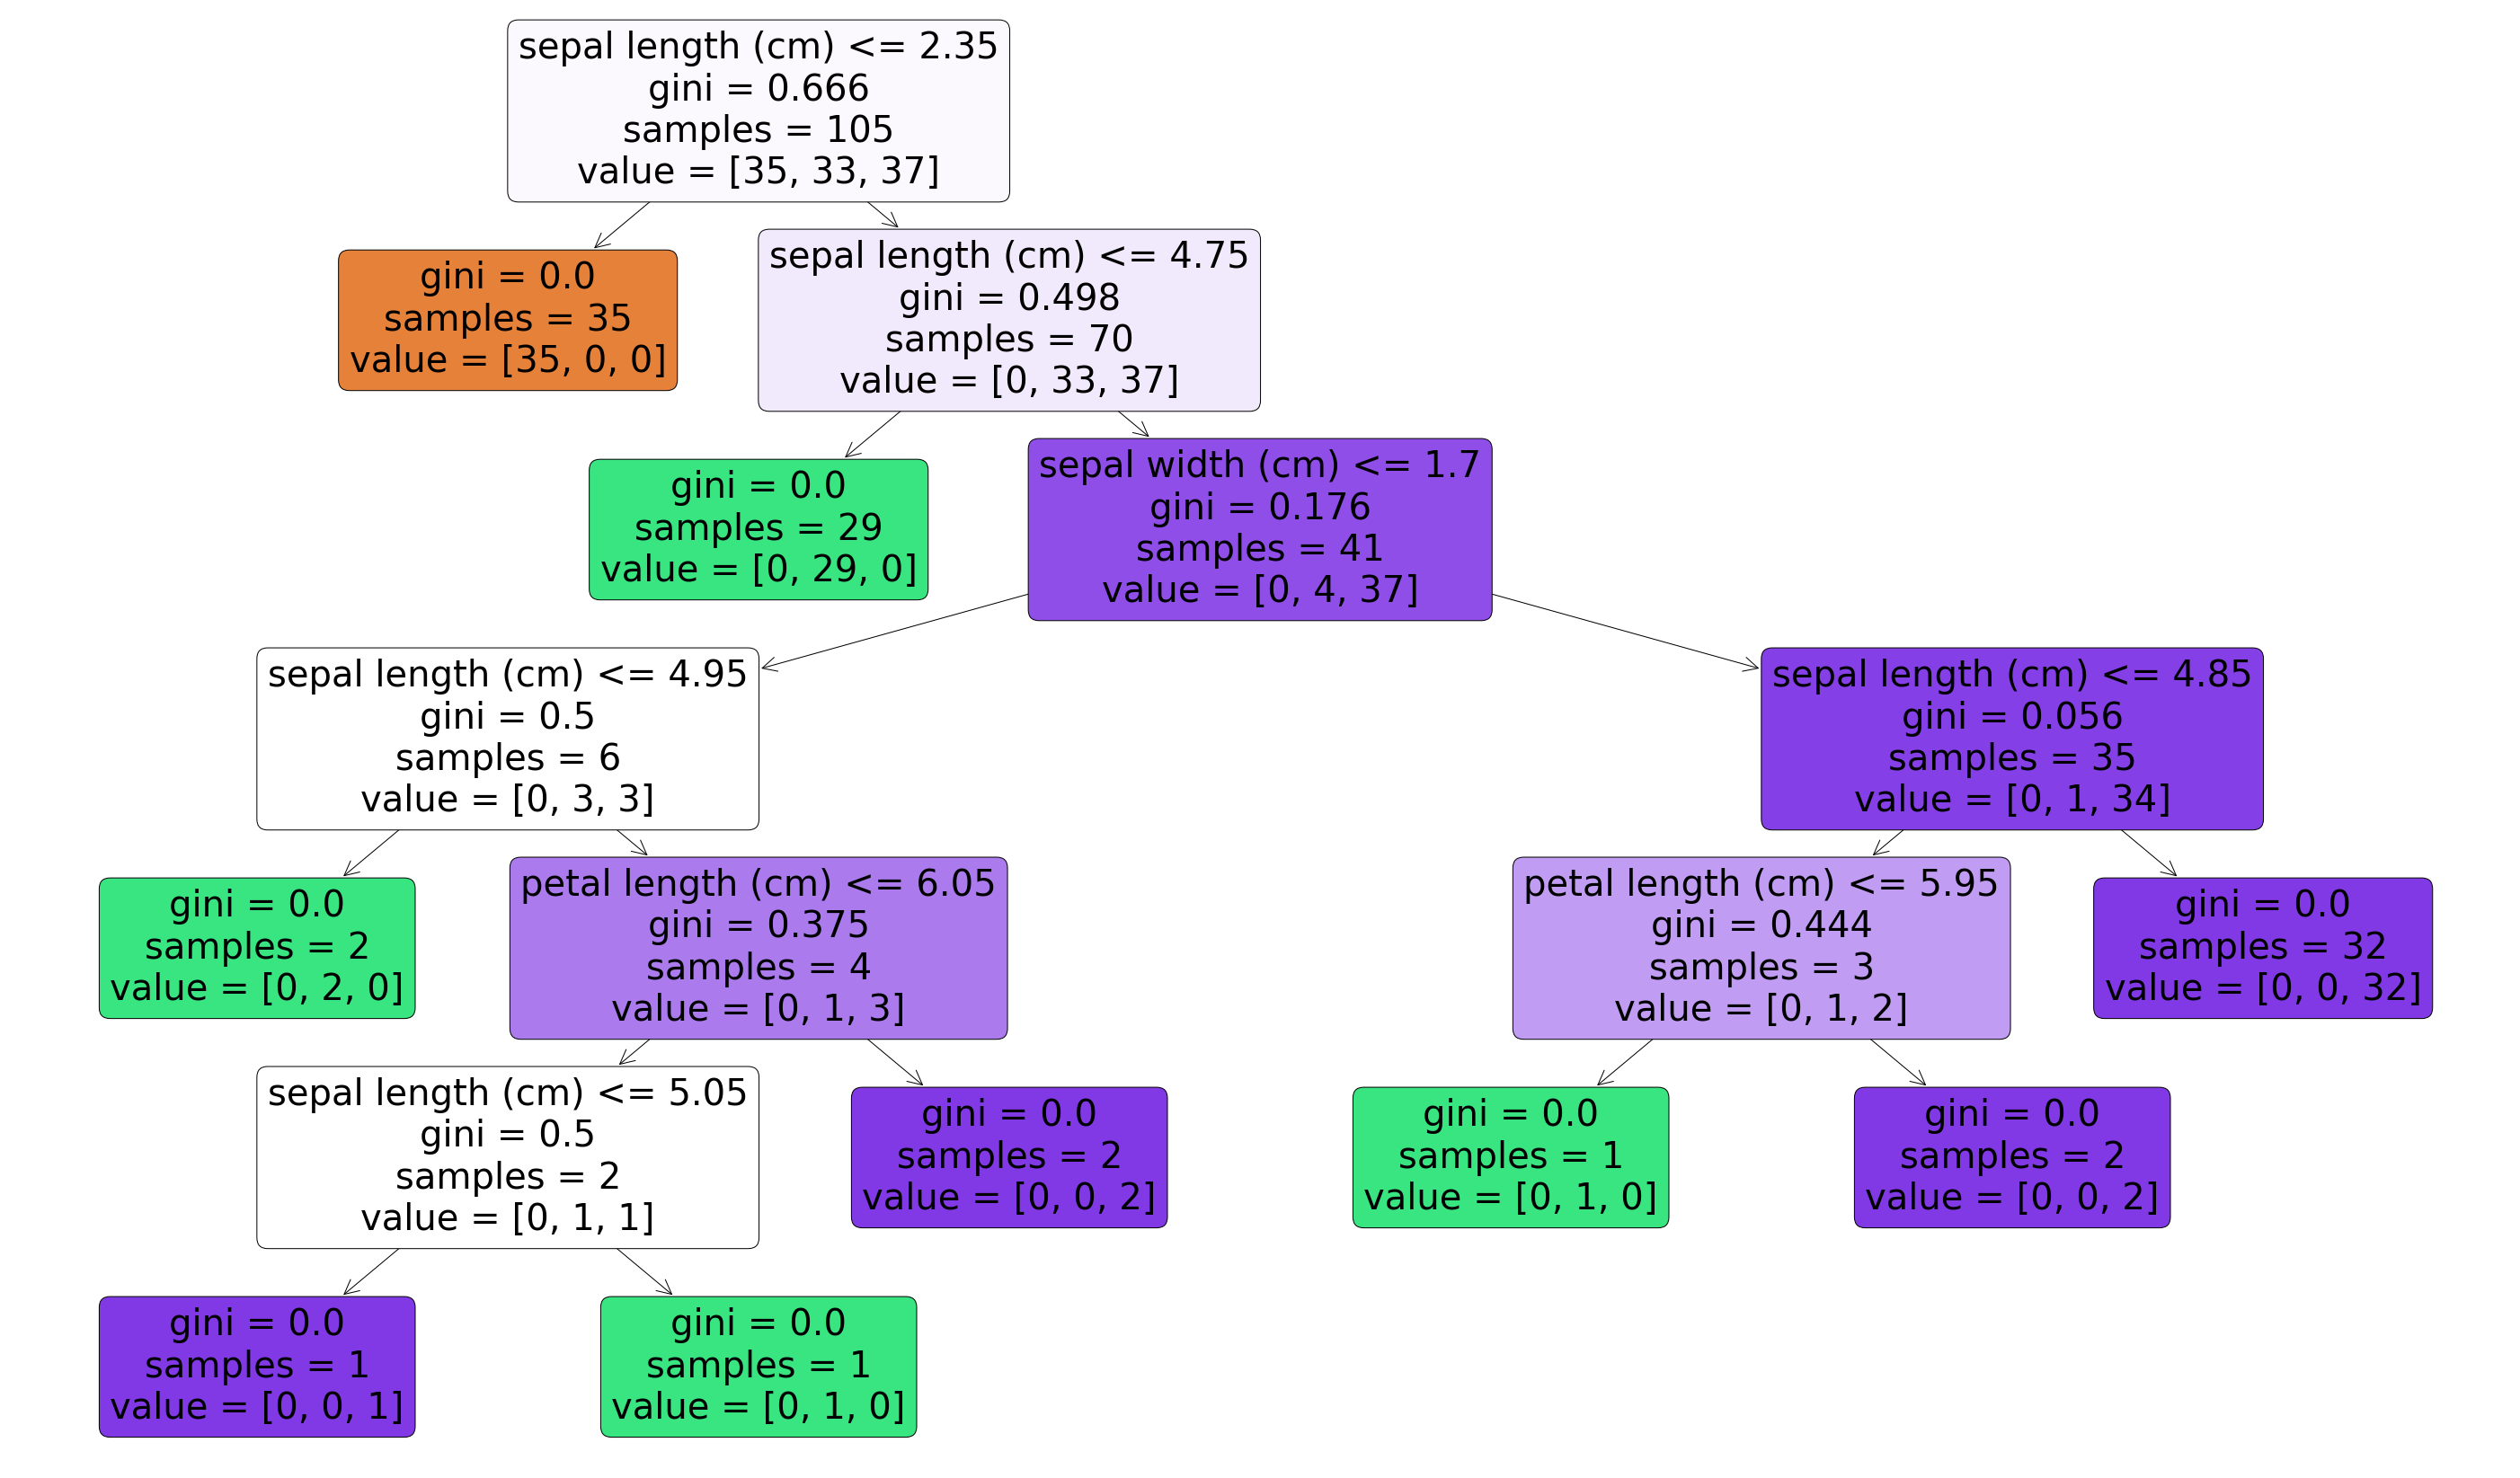

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(Dtree, feature_names=IRISS.feature_names,filled=True,rounded=True);

### STEP 14 : METRICS EVALUATION

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
Dtree.score(X_test, y_test)
print("Accuracy of the classifier:",Dtree.score(X_test, y_test))


Confusion Matrix:
[[15  0  0]
 [ 0 16  1]
 [ 0  1 12]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy of the classifier: 0.9555555555555556


##  CONCLUSION :
AFTER ANALYZING THE IRIS DATASET AND APPLYING DECISION TREE CLASSIFIER ALGORITHM THE DECISION TREE WAS CONSTRUCTED.THE TREE PREDICTS THE RIGHT CLASS WHEN NEW DATA IS FEEDED AS WELL.
THE ACCURACY OF 95 % OBTAINED BY THE CLASSIFIER FOR THE GIVEN IRIS DATA.